# Starting Point

## Story telling :)

Long ago in a distant time, i avocado was an unknown fruit in the wild, but a curious human wielding a large stick ventured forth and found me. With various cuisines made, the human discovered that i Avocado had the power to turn a 5/10 meal into a solid 7/10, however,  everything changed when prices were attached. With the differences my species had, it was up to the human to create a function to predict the price of the value my kind would give...

In [ ]:
# upload dataset
from google.colab import files
upl = files.upload()

Saving avocado.csv to avocado.csv


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
# read Avocado dataset
df = pd.read_csv('avocado.csv')
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Avocado info:

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold

In [ ]:
# check for missing values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df['AveragePrice'].idxmax() # get index of highest average price
# get the row with the highest average price
df.loc[df['AveragePrice'] == 3.25]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14125,8,2016-10-30,3.25,16700.94,2325.93,11142.85,0.0,3232.16,3232.16,0.0,0.0,organic,2016,SanFrancisco


In [ ]:
# get the row with the lowest average price
df.loc[df['AveragePrice'] == 0.44]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15261,43,2017-03-05,0.44,64057.04,223.84,4748.88,0.0,59084.32,638.68,58445.64,0.0,organic,2017,CincinnatiDayton


In [ ]:
# convert date feature from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# feature extraction
df['Month'] = df['Date'].dt.month 
df['day_of_week'] = df['Date'].dt.dayofweek
df['day_of_month'] = df['Date'].dt.day
#display new dataset
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day_of_week,day_of_month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,6,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,6,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,6,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,6,29


# visualizations

<Axes: xlabel='AveragePrice', ylabel='Density'>

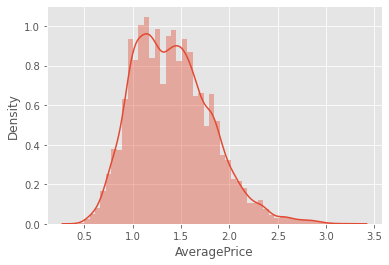

In [ ]:
#Average Price distribution
sns.distplot(df['AveragePrice'])

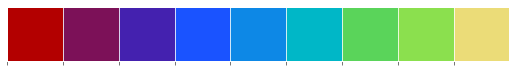

In [ ]:
# color scheme
river_nights = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"]
# color palates
sns.palplot(river_nights)

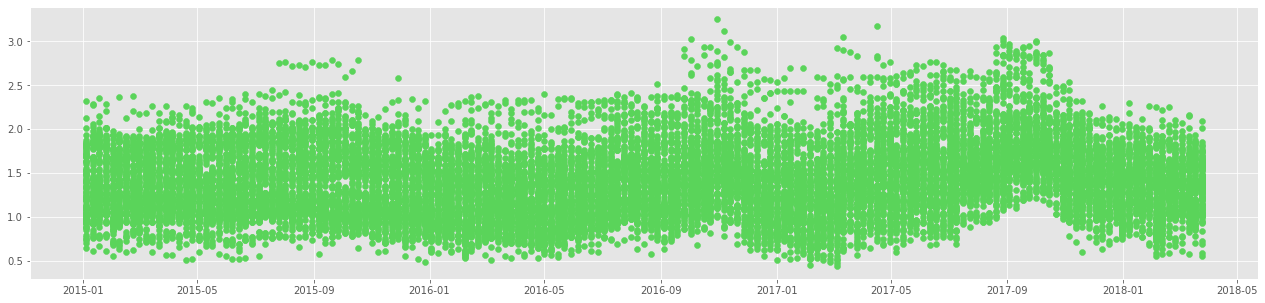

In [ ]:
# plot  date and price
plt.figure(figsize=(22,5))
plt.scatter(df['Date'],df['AveragePrice'],color=river_nights[6])

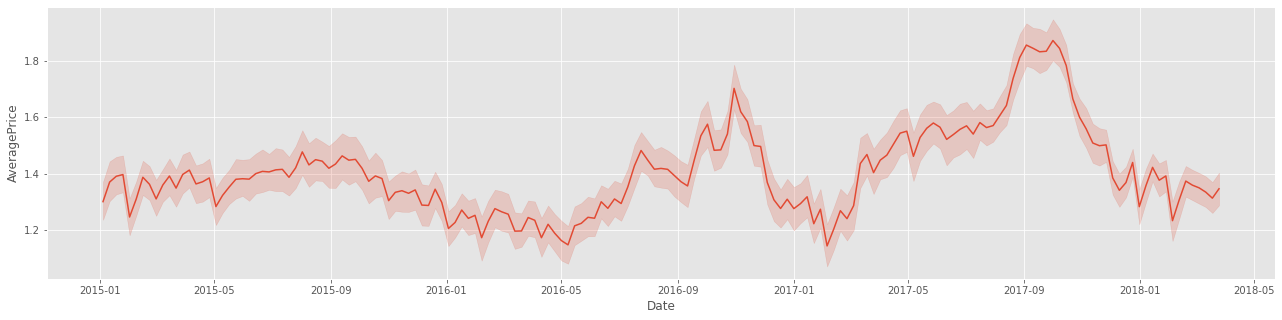

In [ ]:
# lineplot  date and price
plt.figure(figsize=(22,5))
sns.lineplot(x = df['Date'] ,y = 'AveragePrice',data = df,palette = river_nights[3]);
# sns.lineplot(df['Date'],df['AveragePrice'],color=river_nights[6])

Text(0.5, 1.0, 'AveragePrice')

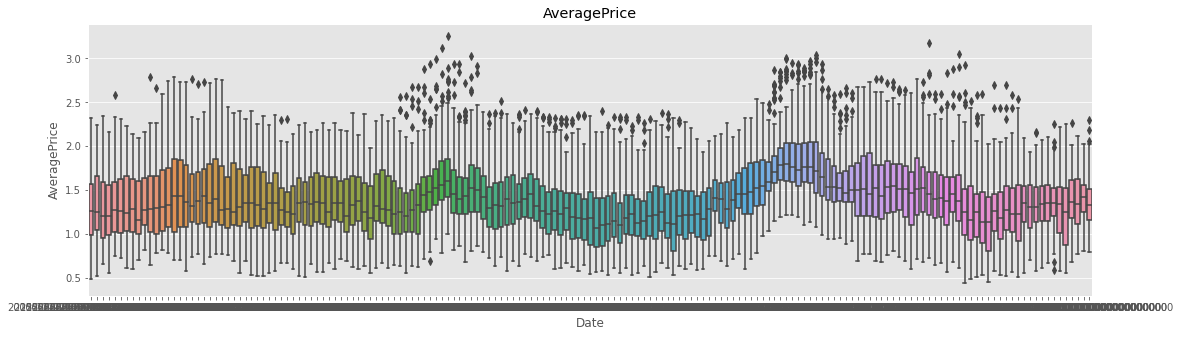

In [ ]:
# boxplot month vs pjme
fig, ax = plt.subplots(figsize=(18,5))
sns.boxplot(data=df, x='Date',y='AveragePrice')
ax.set_title('AveragePrice')

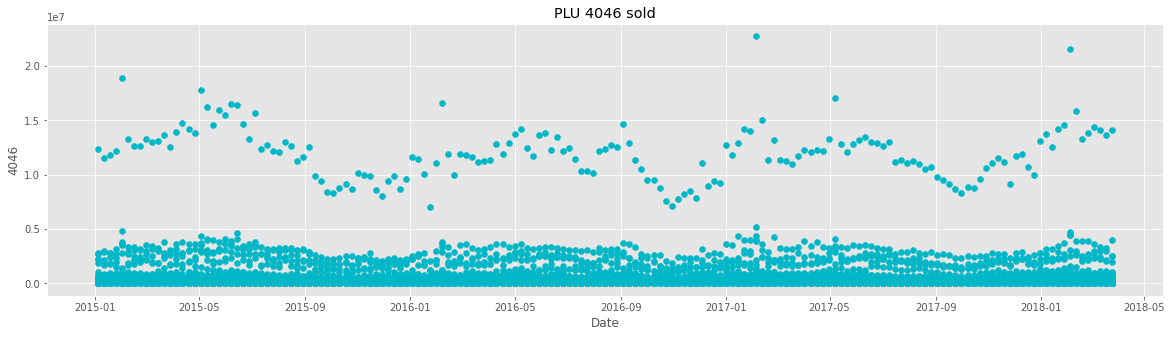

In [ ]:
# plot date and  PLU 4046 sold
plt.figure(figsize=(20,5))
plt.title('PLU 4046 sold')
plt.xlabel('Date')
plt.ylabel('4046')
plt.scatter(df['Date'],df['4046'],color=river_nights[5])

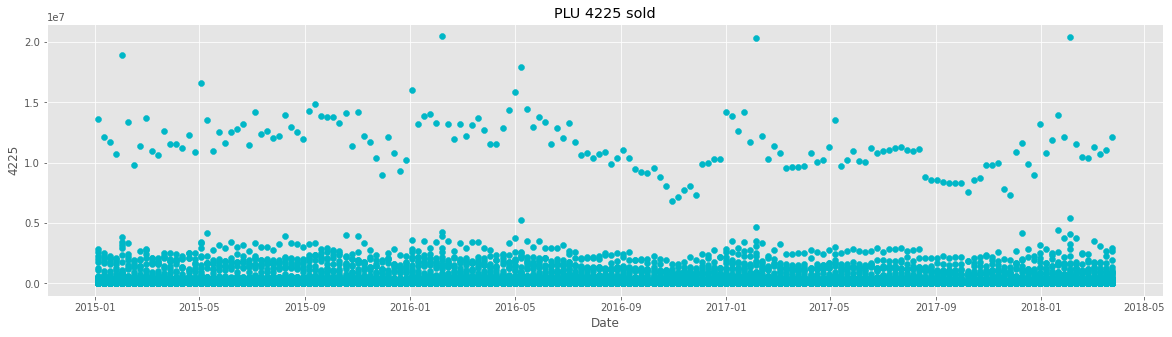

In [ ]:
# plot date and  PLU 4225 sold
plt.figure(figsize=(20,5))
plt.title('PLU 4225 sold')
plt.xlabel('Date')
plt.ylabel('4225')
plt.scatter(df['Date'],df['4225'],color=river_nights[5])

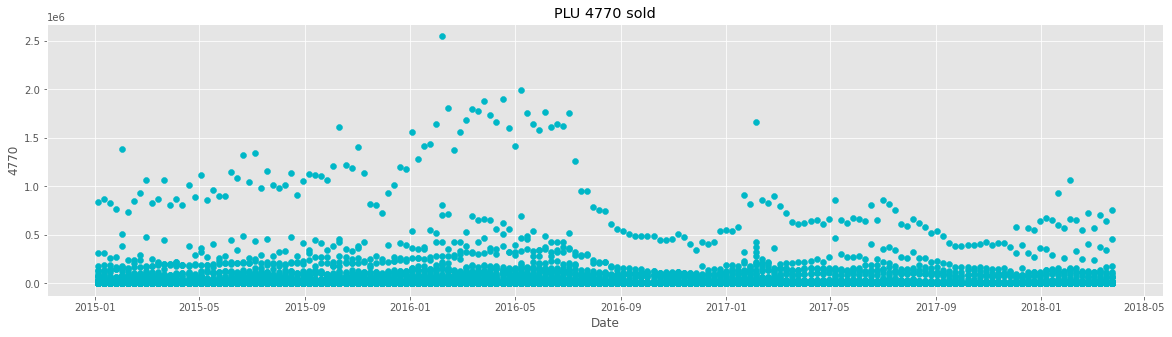

In [ ]:
# plot date and  PLU 4770 sold
plt.figure(figsize=(20,5))
plt.title('PLU 4770 sold')
plt.xlabel('Date')
plt.ylabel('4770')
plt.scatter(df['Date'],df['4770'],color=river_nights[5])

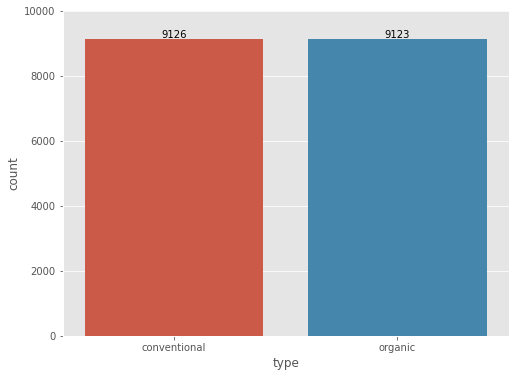

In [ ]:
# type countplot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='type',data=df)
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

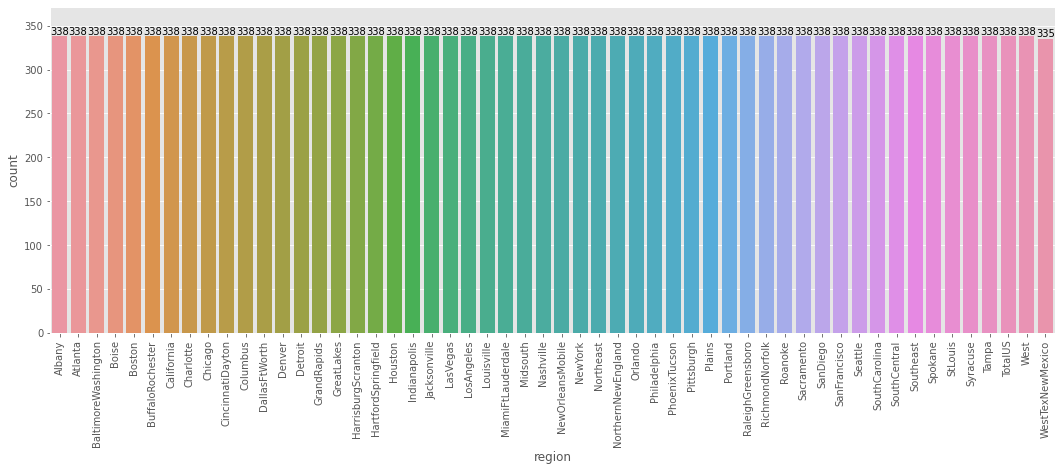

In [ ]:
# region countplot
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
ax =sns.countplot(x='region', data=df)
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

In [ ]:
# get the regions with the most sales
# which avocado type has the most sales
#create a dataframe with only conventional avocado types
df_conventional =  df.loc[df['type'] == 'conventional']
df_organic = df.loc[df['type'] == 'organic']

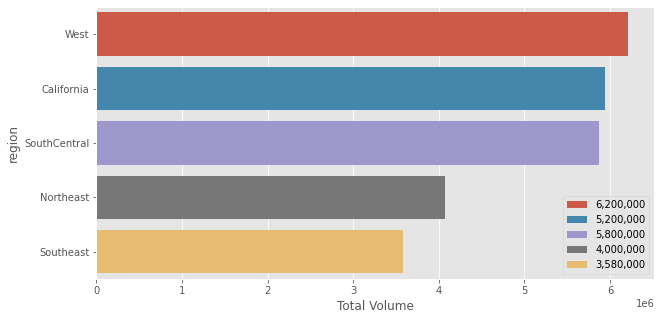

In [ ]:
# drop TotalUS from region column
df_conventional= df_conventional[~df_conventional.region.str.contains("TotalUS")]

# group the data by region
# aggregate the data by mean and sort it
con_reg = df_conventional.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume',ascending = False).iloc[:5]
# plot 
plt.figure(figsize=(10,5))
ax = sns.barplot(x=con_reg['Total Volume'], y=con_reg.index,label=["6,200,000", "5,200,000",'5,800,000','4,000,000','3,580,000'])
# legend
plt.legend(loc ="lower right")

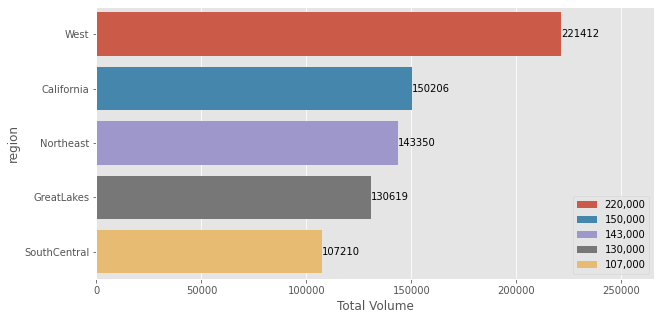

In [ ]:
# drop TotalUS from region column
df_organic= df_organic[~df_organic.region.str.contains("TotalUS")]

# group the data by region
# aggregate the data by mean and sort it
organic_aggregate = df_organic.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume',ascending = False).iloc[:5]
# plot 
plt.figure(figsize=(10,5))
ax = sns.barplot(x=organic_aggregate['Total Volume'], y=organic_aggregate.index,label=['220,000','150,000','143,000','130,000','107,000'])
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(x=0.2)
# legend
plt.legend(loc ="lower right")

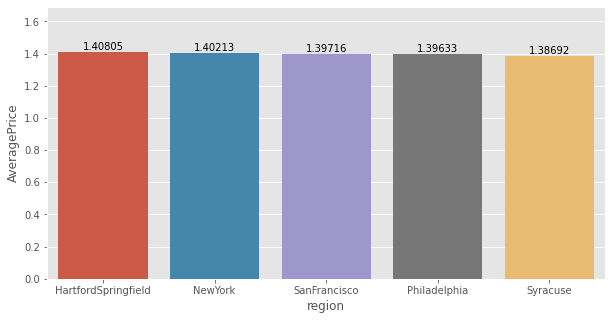

In [ ]:
#get regions with the highest price
# convectional avocados
con_price = df_conventional.groupby(['region']).aggregate({'AveragePrice':np.mean}).sort_values(by = 'AveragePrice',ascending = False).iloc[:5]

# plot
plt.figure(figsize=(10,5))
ax = sns.barplot(x=con_price.index, y=con_price['AveragePrice'],data=con_price)
# axes labels
ax.bar_label(ax.containers[0],label_type='edge')

# padding
ax.margins(y=.2)

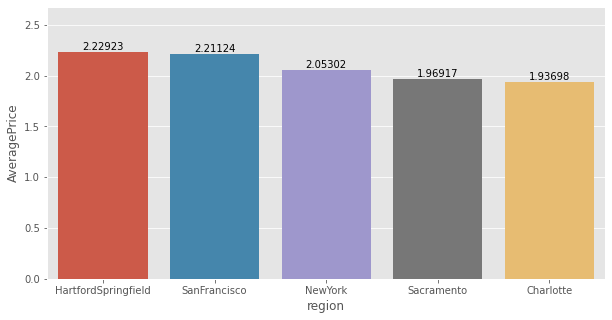

In [ ]:
#get regions with the highest price
# convectional avocados
organic_price = df_organic.groupby(['region']).aggregate({'AveragePrice':np.mean}).sort_values(by = 'AveragePrice',ascending = False).iloc[:5]

# plot
plt.figure(figsize=(10,5))
ax = sns.barplot(x=organic_price.index, y=organic_price['AveragePrice'],data=organic_price)
# axes labels
ax.bar_label(ax.containers[0],label_type='edge')

# padding
ax.margins(y=.2)

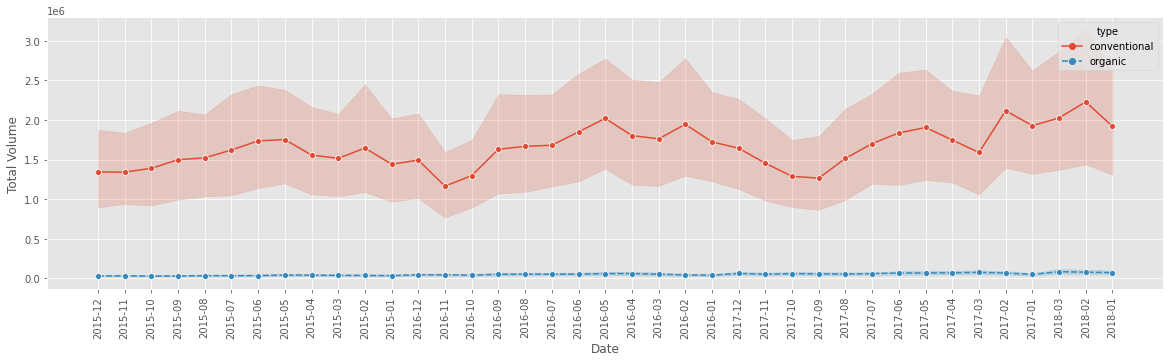

In [ ]:
# convectional avocado sales over time
plt.figure(figsize=(20,5))
df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))
plt.xticks(rotation=90)
sns.lineplot(x = 'Date' ,y = 'Total Volume',data = df, hue = 'type', style = 'type', markers = ['o', 'o'],);

# Extra